In \[12\]:

    # Random Forest Classification

In \[13\]:

    # importing required librarires

    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline

In \[14\]:

    # importing dataset

    data = pd.read_csv(r'C:\Users\LENOVO\Desktop\airline_passenger_satisfaction.csv')
    data.head()

Out\[14\]:

|     | ID  | Gender | Age | Customer Type | Type of Travel | Class    | Flight Distance | Departure Delay | Arrival Delay | Departure and Arrival Time Convenience | ... | On-board Service | Seat Comfort | Leg Room Service | Cleanliness | Food and Drink | In-flight Service | In-flight Wifi Service | In-flight Entertainment | Baggage Handling | Satisfaction            |
|-----|-----|--------|-----|---------------|----------------|----------|-----------------|-----------------|---------------|----------------------------------------|-----|------------------|--------------|------------------|-------------|----------------|-------------------|------------------------|-------------------------|------------------|-------------------------|
| 0   | 1   | Male   | 48  | First-time    | Business       | Business | 821             | 2               | 5.0           | 3                                      | ... | 3                | 5            | 2                | 5           | 5              | 5                 | 3                      | 5                       | 5                | Neutral or Dissatisfied |
| 1   | 2   | Female | 35  | Returning     | Business       | Business | 821             | 26              | 39.0          | 2                                      | ... | 5                | 4            | 5                | 5           | 3              | 5                 | 2                      | 5                       | 5                | Satisfied               |
| 2   | 3   | Male   | 41  | Returning     | Business       | Business | 853             | 0               | 0.0           | 4                                      | ... | 3                | 5            | 3                | 5           | 5              | 3                 | 4                      | 3                       | 3                | Satisfied               |
| 3   | 4   | Male   | 50  | Returning     | Business       | Business | 1905            | 0               | 0.0           | 2                                      | ... | 5                | 5            | 5                | 4           | 4              | 5                 | 2                      | 5                       | 5                | Satisfied               |
| 4   | 5   | Female | 49  | Returning     | Business       | Business | 3470            | 0               | 1.0           | 3                                      | ... | 3                | 4            | 4                | 5           | 4              | 3                 | 3                      | 3                       | 3                | Satisfied               |

5 rows × 24 columns

In \[15\]:

    # getting null count and data type

    data.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 129880 entries, 0 to 129879
    Data columns (total 24 columns):
     #   Column                                  Non-Null Count   Dtype  
    ---  ------                                  --------------   -----  
     0   ID                                      129880 non-null  int64  
     1   Gender                                  129880 non-null  object 
     2   Age                                     129880 non-null  int64  
     3   Customer Type                           129880 non-null  object 
     4   Type of Travel                          129880 non-null  object 
     5   Class                                   129880 non-null  object 
     6   Flight Distance                         129880 non-null  int64  
     7   Departure Delay                         129880 non-null  int64  
     8   Arrival Delay                           129487 non-null  float64
     9   Departure and Arrival Time Convenience  129880 non-null  int64  
     10  Ease of Online Booking                  129880 non-null  int64  
     11  Check-in Service                        129880 non-null  int64  
     12  Online Boarding                         129880 non-null  int64  
     13  Gate Location                           129880 non-null  int64  
     14  On-board Service                        129880 non-null  int64  
     15  Seat Comfort                            129880 non-null  int64  
     16  Leg Room Service                        129880 non-null  int64  
     17  Cleanliness                             129880 non-null  int64  
     18  Food and Drink                          129880 non-null  int64  
     19  In-flight Service                       129880 non-null  int64  
     20  In-flight Wifi Service                  129880 non-null  int64  
     21  In-flight Entertainment                 129880 non-null  int64  
     22  Baggage Handling                        129880 non-null  int64  
     23  Satisfaction                            129880 non-null  object 
    dtypes: float64(1), int64(18), object(5)
    memory usage: 23.8+ MB

In \[16\]:

    satisfy = {'Satisfied': 1,'Neutral or Dissatisfied': 0}

    data.Satisfaction = [satisfy[item] for item in data.Satisfaction]

In \[17\]:

    # Splitting the data into features and labels

    X = data.iloc[:-120000, [2,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22]].values
    y = data.iloc[:-120000, -1].values

In \[18\]:

    y

Out\[18\]:

    array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In \[19\]:

    y.shape

Out\[19\]:

    (9880,)

In \[20\]:

    # Splitting the dataset into the Training set and Test set

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In \[21\]:

    # feature scaling

    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

In \[22\]:

    # importing RandomForestClassifier from ensemble module
    # Training the Random Forest Classification model on the Training set

    from sklearn.ensemble import RandomForestClassifier

    rf = RandomForestClassifier(n_estimators = 50,
                                max_depth = 5,
                                min_samples_leaf = 5,
                                oob_score = True, 
                                random_state = 46, 
                                n_jobs = -1)
    rf.fit(X_train, y_train)

Out\[22\]:

    RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=50,
                           n_jobs=-1, oob_score=True, random_state=46)

In \[23\]:

    # listing of parameter/hyperparameters names

    rf.get_params()

Out\[23\]:

    {'bootstrap': True,
     'ccp_alpha': 0.0,
     'class_weight': None,
     'criterion': 'gini',
     'max_depth': 5,
     'max_features': 'auto',
     'max_leaf_nodes': None,
     'max_samples': None,
     'min_impurity_decrease': 0.0,
     'min_impurity_split': None,
     'min_samples_leaf': 5,
     'min_samples_split': 2,
     'min_weight_fraction_leaf': 0.0,
     'n_estimators': 50,
     'n_jobs': -1,
     'oob_score': True,
     'random_state': 46,
     'verbose': 0,
     'warm_start': False}

In \[24\]:

    # getting model score 

    rf.oob_score_

Out\[24\]:

    0.9203778677462888

In \[25\]:

    #hyperparameter tunning using GridSearchCV

In \[26\]:

    rf1 = RandomForestClassifier(random_state = 42, n_jobs = -1)

In \[63\]:

    # listing all parameter for tuning
    params = {
        'max_samples':[3000],
        'min_samples_leaf': [1],
        'max_features': [9],
        'min_samples_split': [10],
        'n_estimators': list(range(1,700))}
            

In \[64\]:

    #Instantiate the grid search model
    from sklearn.model_selection import GridSearchCV
    grid_search = GridSearchCV(estimator = rf1,
                               param_grid = params,
                               cv = 2,
                               n_jobs = -1, 
                               verbose = 4, 
                               scoring = "accuracy" )

In \[65\]:

    grid_search.fit(X_train, y_train)

    Fitting 2 folds for each of 699 candidates, totalling 1398 fits

    [Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
    [Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
    [Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:    7.1s
    [Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:   25.3s
    [Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed:  1.1min
    [Parallel(n_jobs=-1)]: Done 669 tasks      | elapsed:  2.6min
    [Parallel(n_jobs=-1)]: Done 938 tasks      | elapsed:  5.1min
    [Parallel(n_jobs=-1)]: Done 1257 tasks      | elapsed:  9.6min
    [Parallel(n_jobs=-1)]: Done 1398 out of 1398 | elapsed: 11.9min finished

Out\[65\]:

    GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                 n_jobs=-1,
                 param_grid={'max_features': [9], 'max_samples': [3000],
                             'min_samples_leaf': [1], 'min_samples_split': [10],
                             'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                              13, 14, 15, 16, 17, 18, 19, 20, 21,
                                              22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
                 scoring='accuracy', verbose=4)

In \[66\]:

    #getting keys from cv_results

    grid_search.cv_results_.keys()

Out\[66\]:

    dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_features', 'param_max_samples', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In \[67\]:

    # storing all the results in dataframe

    df = pd.DataFrame(grid_search.cv_results_)
    df = df[['mean_test_score',
             'rank_test_score',
             'param_max_features',
             'param_max_samples',
             'param_min_samples_leaf',
             'param_min_samples_split',
             'param_n_estimators',]]
            
    df.sort_values(by='rank_test_score', inplace=True)
    df

Out\[67\]:

|     | mean_test_score | rank_test_score | param_max_features | param_max_samples | param_min_samples_leaf | param_min_samples_split | param_n\_estimators |
|-----|-----------------|-----------------|--------------------|-------------------|------------------------|-------------------------|---------------------|
| 353 | 0.945884        | 1               | 9                  | 3000              | 1                      | 10                      | 354                 |
| 342 | 0.945749        | 2               | 9                  | 3000              | 1                      | 10                      | 343                 |
| 351 | 0.945749        | 2               | 9                  | 3000              | 1                      | 10                      | 352                 |
| 352 | 0.945614        | 4               | 9                  | 3000              | 1                      | 10                      | 353                 |
| 354 | 0.945614        | 4               | 9                  | 3000              | 1                      | 10                      | 355                 |
| ... | ...             | ...             | ...                | ...               | ...                    | ...                     | ...                 |
| 5   | 0.934818        | 695             | 9                  | 3000              | 1                      | 10                      | 6                   |
| 3   | 0.933333        | 696             | 9                  | 3000              | 1                      | 10                      | 4                   |
| 2   | 0.927800        | 697             | 9                  | 3000              | 1                      | 10                      | 3                   |
| 1   | 0.920918        | 698             | 9                  | 3000              | 1                      | 10                      | 2                   |
| 0   | 0.901619        | 699             | 9                  | 3000              | 1                      | 10                      | 1                   |

699 rows × 7 columns

In \[24\]:

    # Plotting params values and score

In \[25\]:

    sns.set_theme(style="darkgrid")

In \[56\]:

    sns.relplot(x = 'param_max_features', y = 'mean_test_score', kind = 'line', data = df ) 

Out\[56\]:

    <seaborn.axisgrid.FacetGrid at 0x27138516850>

![](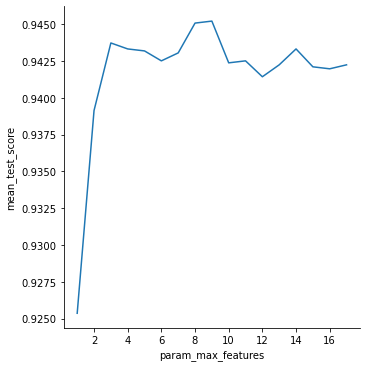%0A)

In \[44\]:

    sns.relplot(x = 'param_max_samples', y = 'mean_test_score', kind = 'line', data = df ) #DONE

Out\[44\]:

    <seaborn.axisgrid.FacetGrid at 0x27137c3d370>

![](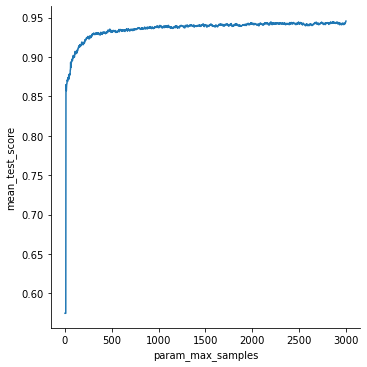%0A)

In \[50\]:

    sns.relplot(x = 'param_min_samples_leaf', y = 'mean_test_score', kind = 'line', data = df ) #done

Out\[50\]:

    <seaborn.axisgrid.FacetGrid at 0x271384bba90>

![](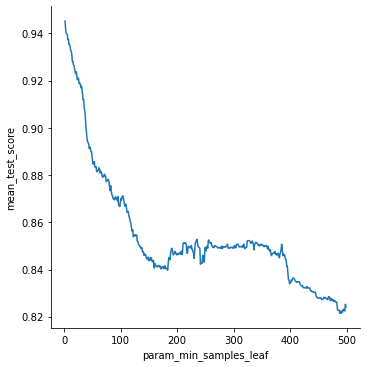%0A)

In \[62\]:

    sns.relplot(x = 'param_min_samples_split', y = 'mean_test_score', kind = 'line', data = df ) #done

Out\[62\]:

    <seaborn.axisgrid.FacetGrid at 0x27138599e50>

![](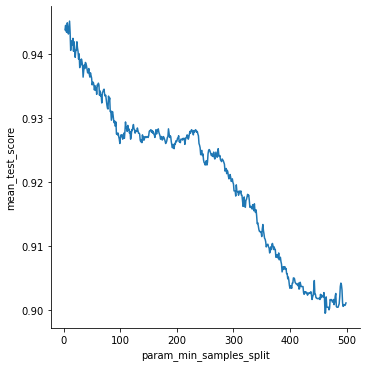%0A)

In \[68\]:

    sns.relplot(x = 'param_n_estimators', y = 'mean_test_score', kind = 'line', data = df )

Out\[68\]:

    <seaborn.axisgrid.FacetGrid at 0x271386a4340>

![](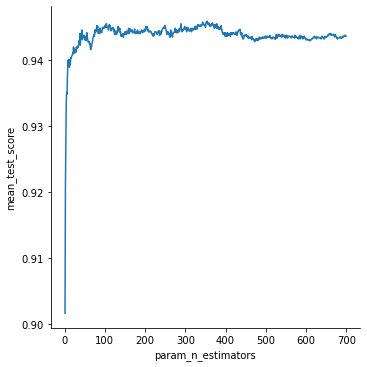%0A)

In \[ \]: